# Welcome to the StAP Exercise 1 solutions

**Topic: probability density functions and sampling**

- This notebook gives example solutions for "Exercise 1 - probability density functions and sampling"
- This notebook and the exercise pdf are hosted on the StAP repository on [github.com/GuckLab/StAP](https://github.com/GuckLab/StAP).
- The related lecture is called "" and is stored in the resources tab of the above repo. (The video is on the sharedrive).

Conrad Moeckel and Eoghan O'Connell, Guck Division, MPL, 2021

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [3]:
max(np.random.randint(1, 6, 2))

5

In [4]:
res = []
n = 10 ** 2

In [5]:
for i in range(1, n + 1):
    res.append(max(np.random.randint(1, high=7, size=2)))

In [6]:
(min(res), max(res), res.count(6))

(1, 6, 24)

How many bins should the histogram have?

In [7]:
bins = [x - 0.5 for x in list(range(1, 8))]
print(f"There are {len(bins)} numbers in our bin list (because python needs the end point).")
print(f"But we have {len(bins) - 1} bins")

There are 7 numbers in our bin list (because python needs the end point).
But we have 6 bins


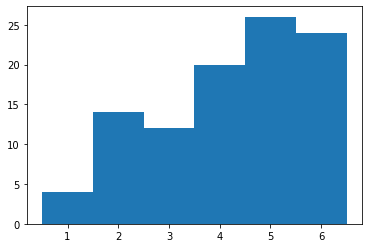

In [8]:
hst = plt.hist(res, bins=bins, histtype='bar')

Let's look at the probability of each number appearing

In [9]:
probability_number = hst[0] / n
prob_arr = np.array([range(1, 7), probability_number])
print(prob_arr.T)

[[1.   0.04]
 [2.   0.14]
 [3.   0.12]
 [4.   0.2 ]
 [5.   0.26]
 [6.   0.24]]


Why is it that theoretical values and simulated ones do not coincide?

In [10]:
# theoretical probability density for each bin (as shown in the lecture)
dlst = np.asarray([[1, 1 / 36], [2, 3 / 36], [3, 5 / 36],
                   [4, 7 / 36], [5, 9 / 36], [6, 11 / 36]])

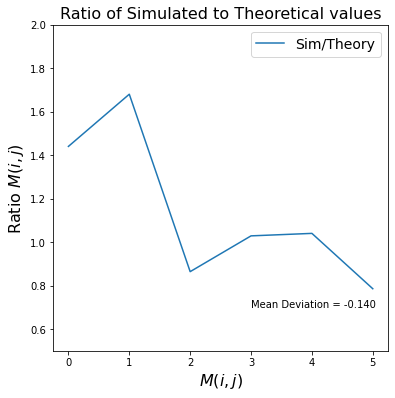

In [11]:
# plot the ratio of the simulated to theoretical values for each bin
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.divide(hst[0] / n, dlst[:, 1]), label='Sim/Theory')
ax.set_ylim([0.5, 2])
ax.set_title('Ratio of Simulated to Theoretical values', fontsize=16)
ax.set_xlabel("$M (i, j)$", fontsize=16)
ax.set_ylabel("Ratio $M (i, j)$", fontsize=16)
plt.legend(fontsize=14)

mean_dev = 1 - np.mean(np.divide(hst[0] / n, dlst[:, 1]))
m_d_text = ax.text(x=3, y=0.7, s=f"Mean Deviation = {mean_dev:.3f}")

(a) (iii) What happens if you increase the sample size to 10^6?

The simulation will converge with the theory.

(b) What is the expected outcome of the experiment?



(c) Would anything change if we took the number on the die that faces the table?

The answer is no. The probability is the same, regardless of which side you look at (consistently).

## Question 2

Let's play a game!

(a) What is the probability of winning a game?

0.5

(b) What is the expected amount of money you win/ loose per game?

Over time the mean return will be 0.

(c) Would you rather play the game 10/100/1000 times? (Simulate it!)

Conrad wouldn't play it, Eoghan would play it 1000 times!

In [12]:
# simulation
n = 100
result = []
for i in range(0, n):
    # get a random sample
    ran_sam = np.random.randint(1, high=7, size=2)
    # sum the random sample and store it in the result list
    result.append(np.sum(ran_sam))

In [13]:
# count the number of 7's, multiply by jackpot (500 euro), subtract amount lost by not getting 7
(result.count(7) * 500) - (100 * (n - result.count(7)))

2000

In [21]:
# now let's put the above in a function so we can play the game
def game1(n):
    result = []
    for j in range(1, n+1):
        result.append(np.sum(np.random.randint(1, high=7, size=2)))
    return (result.count(7) * 500) - (100 * (n - result.count(7)))

In [22]:
game1(0)

0

In [23]:
# let's play the game 100 times
game1(100)

1400

(d) The standard deviation of a (discrete) random variable is defined (see pdf)
- How does this quantity change by playing 10/100/1000 times?
- Would you still play the game?

In [24]:
# we can play n_max games m times now
m = 10
n_max = 10
res1 = np.zeros((n_max, m))
for j in range(0, n_max):
    for i in range(0, m):
        res1[j, i] = game1(j)

In [25]:
means = []
sds = []
for j in range(0, n_max):
    means.append(np.mean(res1[j, :]))
    sds.append(np.std(res1[j, :]))

In [26]:
nbm = np.linspace(0, n_max, 100)
theo_sd = 1 / 6 * np.sqrt(5) * np.sqrt(500 ** 2 * nbm + 100 ** 2 * nbm)
theo_m = 0 * nbm

Plot the analytic and simulated results of mean and standard deviation in
dependence of number of games played.

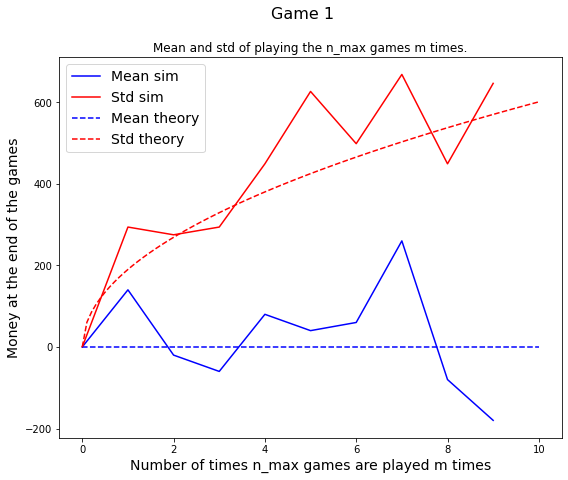

In [27]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(means, c='b', linestyle='-', label='Mean sim')
ax.plot(sds, c='r', linestyle='-', label='Std sim')
ax.plot(nbm, theo_m, c='b', linestyle='--', label='Mean theory')
ax.plot(nbm, theo_sd, c='r', linestyle='--', label='Std theory')
ax.set_xlabel("Number of times n_max games are played m times", fontsize=14)
ax.set_ylabel("Money at the end of the games", fontsize=14)
ax.set_title("Mean and std of playing the n_max games m times.")
_ = ax.legend(fontsize='14', loc=2)
_ = plt.suptitle("Game 1", fontsize='16')

## Question 3

If given the choice, would you rather play the game in (2) or the following one? (See pdf)

In [28]:
def game2(val=10):
    ij = np.prod(np.random.randint(1, high=7, size=2))
    return ij - val

In [39]:
m = 100
n_max = 100
res2 = np.zeros((n_max, m))
for j in range(0, n_max):
    for i in range(0, m):
        res2[j, i] = game2()

In [40]:
means = []
sds = []
for j in range(0, n_max):
    means.append(np.mean(res2[j, :]))
    sds.append(np.std(res2[j, :]))

In [41]:
nbm = np.linspace(0, n_max, 100)
theo_sd = np.ones(nbm.shape[0]) * 10
theo_m = np.ones(nbm.shape[0]) * 2

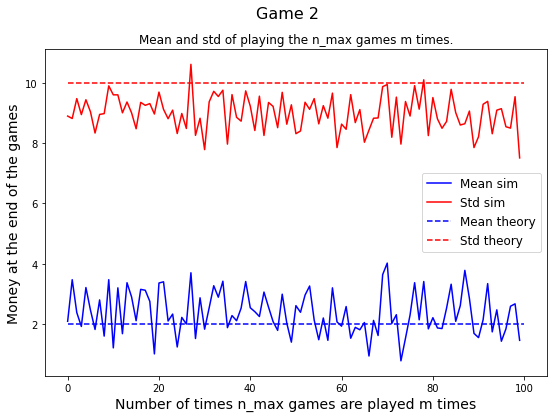

In [42]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(means, c='b', linestyle='-', label='Mean sim')
ax.plot(sds, c='r', linestyle='-', label='Std sim')
ax.plot(nbm, theo_m, c='b', linestyle='--', label='Mean theory')
ax.plot(nbm, theo_sd, c='r', linestyle='--', label='Std theory')
ax.set_xlabel("Number of times n_max games are played m times", fontsize=14)
ax.set_ylabel("Money at the end of the games", fontsize=14)
ax.set_title("Mean and std of playing the n_max games m times.")
_ = ax.legend(fontsize='12')
_ = plt.suptitle("Game 2", fontsize='16')